### Load the data

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Creation of the parameters

In [2]:
x = tf.placeholder(tf.float32, [None, 784])

#layer 1
W1 = tf.Variable(tf.random_uniform([784,100], -0.01, 0.01))
b1 = tf.get_variable('b1', [1,], initializer=tf.random_normal_initializer())
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1) 

#layer 2
W2 = tf.get_variable('w2',[100,10], initializer= tf.random_normal_initializer())
b2 = tf.get_variable('b2',[1,], initializer=tf.random_normal_initializer())
y2 = tf.nn.softmax(tf.matmul(y1, W2) + b2)

#output
y = y2
y_ = tf.placeholder(tf.float32, [None, 10])

### Train the model

In [4]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

losses = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
    _, loss_val = sess.run([train_step, cross_entropy],
                           feed_dict={x: batch_xs, y_: batch_ys})
    losses.append(loss_val)

In [5]:
for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

0.9728


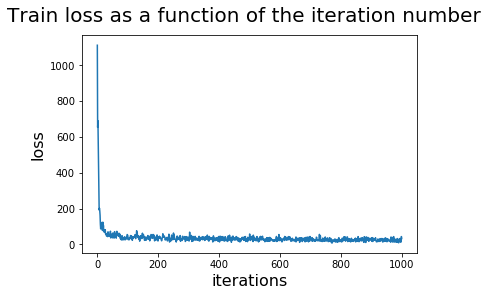

In [13]:
import matplotlib.pyplot as plt
import numpy as np
iteration = range(1000)
fig = plt.figure()
fig.suptitle("Train loss as a function of the iteration number", fontsize=20)
plt.plot(iteration,losses)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.show()

### Test the model on new data

In [11]:
print("Accuracy of the model on test data : " + str(round(100*sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}),2))+"%")

Accuracy of the model on test data : 97.28%
